In [68]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
%matplotlib inline

In [69]:
# dfsource = pd.read_csv("dataForClustering.csv")
dfsource = pd.read_csv('dataFOrClustering.csv', encoding='latin-1')
df = dfsource.iloc[:,:-2]#all cols except last 2 cols
df_names= dfsource.iloc[:,-1:]#bookname col
namelist = df_names.values.tolist()
namelist = [i[0] for i in namelist]#flatten
namelist
df

point 1   point 2   point 3   point 4   point 5   point 6   point 7  \
0     5.398538  5.362164  5.374532  5.362427  5.363713  5.422135  5.445146   
1     5.382277  5.341676  5.320551  5.319191  5.309058  5.330970  5.384604   
2     5.782394  5.778088  5.746494  5.694246  5.678362  5.624833  5.554372   
3     5.539855  5.584239  5.534958  5.485876  5.479950  5.457228  5.398873   
4     5.385288  5.345463  5.375112  5.465438  5.380601  5.421677  5.295461   
5     5.349392  5.358425  5.364282  5.416105  5.500000  5.512459  5.482707   
6     5.514100  5.530176  5.483611  5.523267  5.547656  5.547316  5.522213   
7     5.338006  5.319050  5.318194  5.352820  5.395240  5.401951  5.386209   
8     5.342931  5.382422  5.416035  5.445240  5.456169  5.456353  5.478119   
9     5.309100  5.298817  5.342420  5.399612  5.407488  5.401857  5.367496   
10    5.358744  5.347396  5.320315  5.314397  5.295530  5.295461  5.330201   
11    5.325406  5.305446  5.282063  5.305312  5.334608  5.334563  5.329673   
12    5.615270  5.582311  5.590550  5.627805  5.621231  5.583012  5.606504   
13    5.528202  5.507397  5.512714  5.485899  5.481738  5.451225  5.449607   
14    5.376670  5.362649  5.357938  5.393832  5.447639  5.444338  5.407420   
15    5.322544  5.267326  5.270264  5.295190  5.350185  5.385426  5.362015   
16    5.533639  5.483010  5.449892  5.420941  5.343301  5.316433  5.442834   
17    5.426111  5.408851  5.398566  5.387216  5.351828  5.312264  5.306904   
18    5.304055  5.296227  5.420798  5.377237  5.389256  5.364998  5.409877   
19    5.329494  5.346208  5.362568  5.422071  5.403112  5.405593  5.404500   
20    5.438383  5.424061  5.416712  5.371082  5.375739  5.316625  5.238021   
21    5.313664  5.326284  5.328024  5.319930  5.319843  5.313316  5.328198   
22    5.434705  5.374331  5.405540  5.435917  5.426129  5.516500  5.563142   
23    5.229177  5.234676  5.210705  5.256670  5.296389  5.280724  5.280690   
24    5.455160  5.486979  5.456680  5.355196  5.298779  5.258499  5.271799   
25    5.424582  5.426620  5.409900  5.376940  5.367352  5.388626  5.382154   
26    5.402619  5.420905  5.413048  5.384286  5.420048  5.430571  5.396381   
27    5.369990  5.402469  5.407335  5.414756  5.404902  5.432881  5.462441   
28    5.272405  5.293126  5.307837  5.341415  5.381367  5.360058  5.350183   
29    5.425848  5.378506  5.350160  5.354167  5.339543  5.294338  5.333534   
30    5.594907  5.455668  5.408179  5.459526  5.464623  5.435863  5.429293   
31    5.387143  5.390000  5.393571  5.388571  5.382143  5.386429  5.382857   
32    5.495846  5.530123  5.563510  5.516913  5.431772  5.432589  5.418105   
33    5.319329  5.297859  5.294734  5.290625  5.267766  5.272512  5.262731   
34    5.301370  5.318237  5.338321  5.382243  5.386721  5.395892  5.365001   
35    5.364295  5.380047  5.420054  5.428930  5.453794  5.475237  5.531707   
36    5.385850  5.430077  5.485624  5.446334  5.386633  5.362366  5.344302   
37    5.371246  5.369870  5.372497  5.401464  5.436374  5.471784  5.505130   
38    5.344505  5.354771  5.345713  5.334692  5.323822  5.306310  5.289100   
39    5.356863  5.279902  5.241115  5.263051  5.310447  5.336183  5.370251   
40    5.338569  5.291563  5.267345  5.258644  5.291488  5.296836  5.316836   
41    5.340523  5.339975  5.378605  5.396945  5.368612  5.362052  5.325392   
42    5.552725  5.536079  5.524567  5.499396  5.437878  5.364747  5.328970   
43    5.371645  5.355057  5.360406  5.356529  5.357462  5.339648  5.352407   
44    5.376577  5.370844  5.400410  5.409582  5.399099  5.378665  5.398280   
45    5.579341  5.554706  5.568213  5.593909  5.554579  5.514993  5.537887   
46    5.440591  5.470422  5.461261  5.460251  5.444093  5.427524  5.389603   
47    5.272539  5.261402  5.261358  5.298726  5.395411  5.396838  5.352226   
48    5.296546  5.288158  5.275319  5.265828  5.262517  5.245779  5.246882   
49    5.362338  5.317937  5.383844  5.357910  5.398240  5.455697  5.467079   
50    5.479672  5.410088  5.2

## Elbow method to determine best K value

In [70]:
k_range = range(1,9)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
sse


[213.32089805212405,
 125.18881309197171,
 99.81401309023455,
 87.37905808302878,
 81.21035489832855,
 75.85537191291417,
 72.18569439693037,
 68.83832681566615]

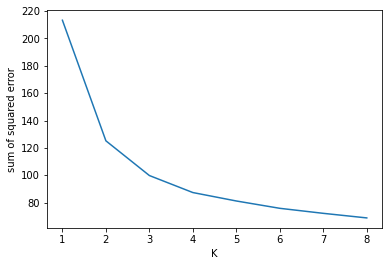

In [71]:
plt.xlabel("K")
plt.ylabel("sum of squared error")
plt.plot(k_range,sse)

## Apply KMeans to generate clusters as new column

In [72]:
clusters = 3
kmeans = KMeans(n_clusters = clusters)
y_predicted = kmeans.fit_predict(df)
print(kmeans.labels_)
print(kmeans.inertia_)

[1 1 2 ... 1 0 2]
99.81401309023455


In [73]:
df["cluster"] = y_predicted
pd.set_option('display.max_rows', None)
# df.head()

## Add back bookname column to df

In [74]:
df["book name"] = namelist
df

point 1   point 2   point 3   point 4   point 5   point 6   point 7  \
0     5.398538  5.362164  5.374532  5.362427  5.363713  5.422135  5.445146   
1     5.382277  5.341676  5.320551  5.319191  5.309058  5.330970  5.384604   
2     5.782394  5.778088  5.746494  5.694246  5.678362  5.624833  5.554372   
3     5.539855  5.584239  5.534958  5.485876  5.479950  5.457228  5.398873   
4     5.385288  5.345463  5.375112  5.465438  5.380601  5.421677  5.295461   
5     5.349392  5.358425  5.364282  5.416105  5.500000  5.512459  5.482707   
6     5.514100  5.530176  5.483611  5.523267  5.547656  5.547316  5.522213   
7     5.338006  5.319050  5.318194  5.352820  5.395240  5.401951  5.386209   
8     5.342931  5.382422  5.416035  5.445240  5.456169  5.456353  5.478119   
9     5.309100  5.298817  5.342420  5.399612  5.407488  5.401857  5.367496   
10    5.358744  5.347396  5.320315  5.314397  5.295530  5.295461  5.330201   
11    5.325406  5.305446  5.282063  5.305312  5.334608  5.334563  5.329673   
12    5.615270  5.582311  5.590550  5.627805  5.621231  5.583012  5.606504   
13    5.528202  5.507397  5.512714  5.485899  5.481738  5.451225  5.449607   
14    5.376670  5.362649  5.357938  5.393832  5.447639  5.444338  5.407420   
15    5.322544  5.267326  5.270264  5.295190  5.350185  5.385426  5.362015   
16    5.533639  5.483010  5.449892  5.420941  5.343301  5.316433  5.442834   
17    5.426111  5.408851  5.398566  5.387216  5.351828  5.312264  5.306904   
18    5.304055  5.296227  5.420798  5.377237  5.389256  5.364998  5.409877   
19    5.329494  5.346208  5.362568  5.422071  5.403112  5.405593  5.404500   
20    5.438383  5.424061  5.416712  5.371082  5.375739  5.316625  5.238021   
21    5.313664  5.326284  5.328024  5.319930  5.319843  5.313316  5.328198   
22    5.434705  5.374331  5.405540  5.435917  5.426129  5.516500  5.563142   
23    5.229177  5.234676  5.210705  5.256670  5.296389  5.280724  5.280690   
24    5.455160  5.486979  5.456680  5.355196  5.298779  5.258499  5.271799   
25    5.424582  5.426620  5.409900  5.376940  5.367352  5.388626  5.382154   
26    5.402619  5.420905  5.413048  5.384286  5.420048  5.430571  5.396381   
27    5.369990  5.402469  5.407335  5.414756  5.404902  5.432881  5.462441   
28    5.272405  5.293126  5.307837  5.341415  5.381367  5.360058  5.350183   
29    5.425848  5.378506  5.350160  5.354167  5.339543  5.294338  5.333534   
30    5.594907  5.455668  5.408179  5.459526  5.464623  5.435863  5.429293   
31    5.387143  5.390000  5.393571  5.388571  5.382143  5.386429  5.382857   
32    5.495846  5.530123  5.563510  5.516913  5.431772  5.432589  5.418105   
33    5.319329  5.297859  5.294734  5.290625  5.267766  5.272512  5.262731   
34    5.301370  5.318237  5.338321  5.382243  5.386721  5.395892  5.365001   
35    5.364295  5.380047  5.420054  5.428930  5.453794  5.475237  5.531707   
36    5.385850  5.430077  5.485624  5.446334  5.386633  5.362366  5.344302   
37    5.371246  5.369870  5.372497  5.401464  5.436374  5.471784  5.505130   
38    5.344505  5.354771  5.345713  5.334692  5.323822  5.306310  5.289100   
39    5.356863  5.279902  5.241115  5.263051  5.310447  5.336183  5.370251   
40    5.338569  5.291563  5.267345  5.258644  5.291488  5.296836  5.316836   
41    5.340523  5.339975  5.378605  5.396945  5.368612  5.362052  5.325392   
42    5.552725  5.536079  5.524567  5.499396  5.437878  5.364747  5.328970   
43    5.371645  5.355057  5.360406  5.356529  5.357462  5.339648  5.352407   
44    5.376577  5.370844  5.400410  5.409582  5.399099  5.378665  5.398280   
45    5.579341  5.554706  5.568213  5.593909  5.554579  5.514993  5.537887   
46    5.440591  5.470422  5.461261  5.460251  5.444093  5.427524  5.389603   
47    5.272539  5.261402  5.261358  5.298726  5.395411  5.396838  5.352226   
48    5.296546  5.288158  5.275319  5.265828  5.262517  5.245779  5.246882   
49    5.362338  5.317937  5.383844  5.357910  5.398240  5.455697  5.467079   
50    5.479672  5.410088  5.2

In [75]:
def transform(df):
    df = df.T
    df.reset_index(drop=True, inplace=True)
    return df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


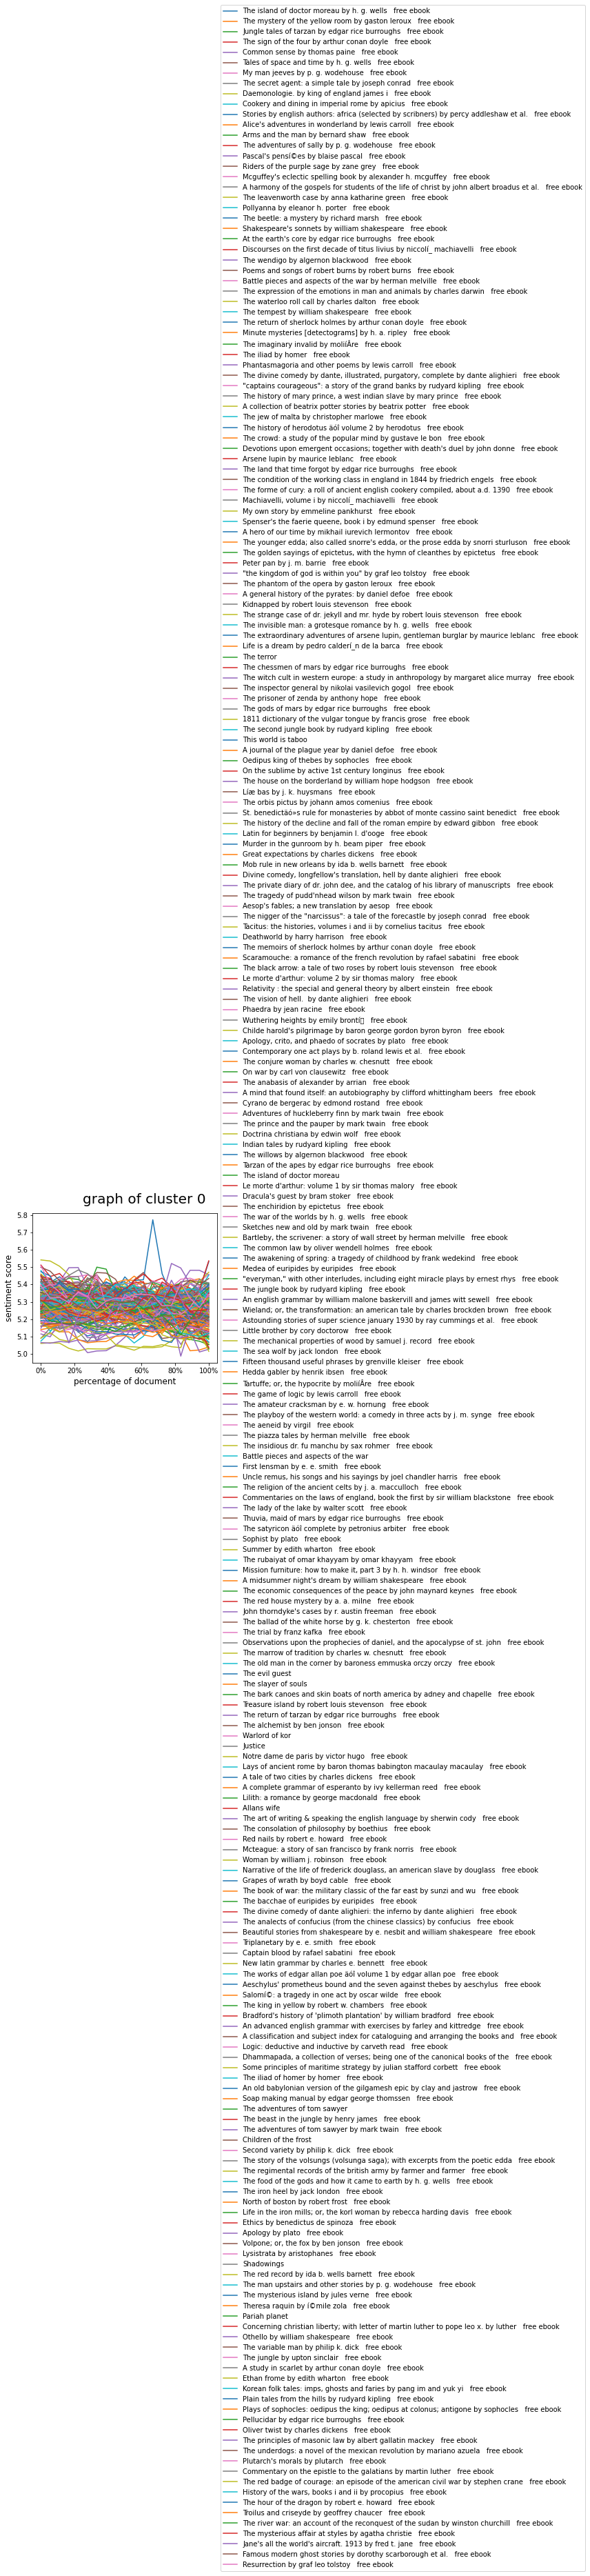

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 130 missing from current font.

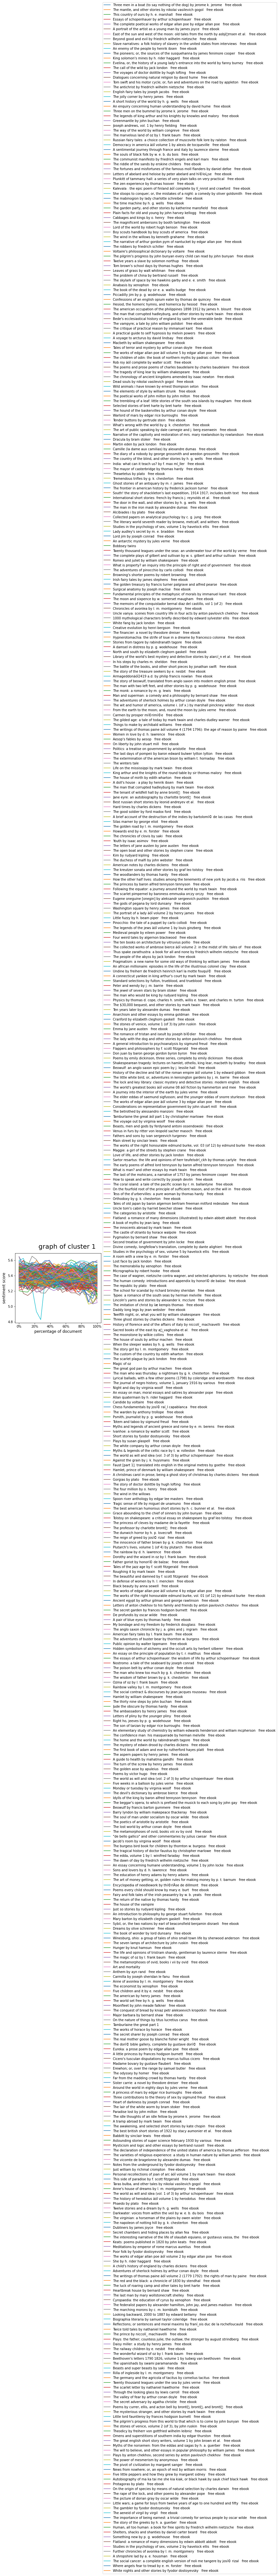

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


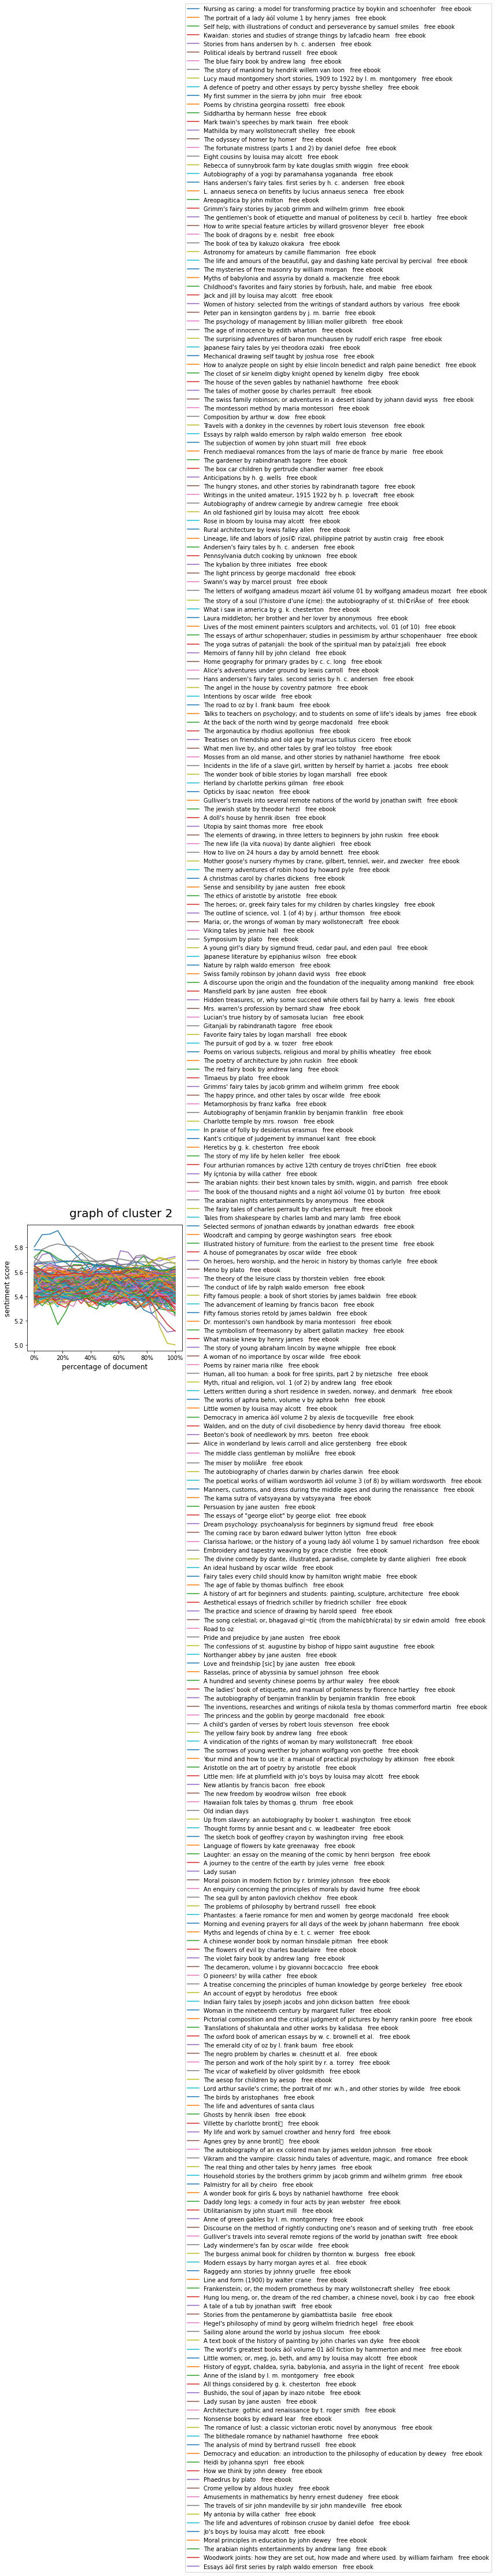

In [76]:
def plot_a_cluster(df,cluster_num):
    booknames = []
    data = transform(df)
    datalist =  data.values.tolist()
#     datalist = np.array(datalist)
    numrows_data = len(datalist)
    booknames = df.iloc[-1].values.tolist()
    
    y = datalist[0][:-2]
    x = np.linspace(0,100,len(y))


    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(x, y, label='%s'%booknames[0])
 
    if numrows_data>1:
        for i in range(1,numrows_data):
            next_y= datalist[i][:-2]
            ax.plot(x,next_y, label = "%s"%booknames[i])


    fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    xticks = mtick.FormatStrFormatter(fmt)
    ax.xaxis.set_major_formatter(xticks)
#     plt.yticks(np.arange(float(min(y)), float(max(y))+1, 0.5))


    fig.suptitle("graph of cluster %i"%cluster_num, fontsize = 20)
    plt.xlabel('percentage of document', fontsize=12)
    plt.ylabel('sentiment score', fontsize=12)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

for i in range(clusters):
    df_i = df[df.cluster.isin([i])]
    df_i = transform(df_i)
    plot_a_cluster(df_i,i)